In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#outliers
#среднее значение, среднеквадратичное отклонение, кол-во сэмплов 

def create_ages(mu=50, sigma=13, num_samples=100, seed=42):
    np.random.seed(seed)
    sample_ages = np.random.normal(loc=mu, scale=sigma, size=num_samples)
    sample_ages = np.round(sample_ages, decimals=0)

    return sample_ages

In [5]:
sample = create_ages()
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

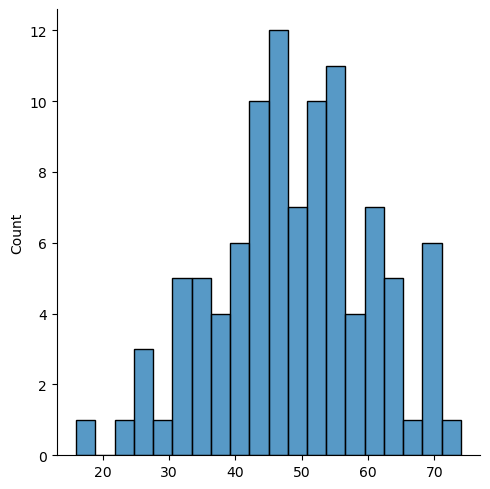

In [6]:
#распределение данных
sns.displot(sample, bins=20)

<Axes: >

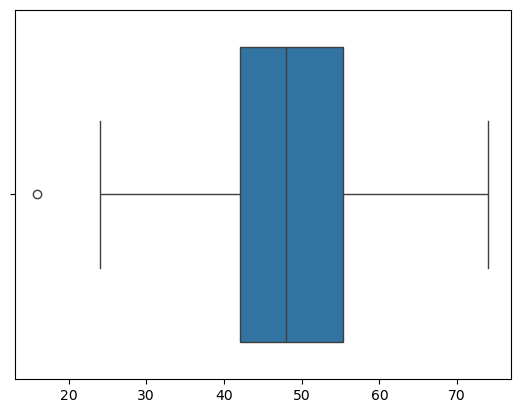

In [8]:
sns.boxplot(x=sample)

In [10]:
#как найти эту точку численно 
ser = pd.Series(sample)
ser.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

In [11]:
#нижняя граница
IQR = 55.25000 - 42.00000 #(75%-25%)
lower_limit = 42.0 - 1.5*IQR
lower_limit

22.125

In [12]:
ser[ser > lower_limit]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

In [14]:
#программно 
np.percentile(sample, [75,25]) #без decribe получили данные 
q75, q25 = np.percentile(sample, [75,25])

np.float64(55.25)

In [26]:
df = pd.read_csv('Ames_Housing_Data.csv')
numeric_df = df.select_dtypes(include=['number'])

In [28]:
numeric_df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

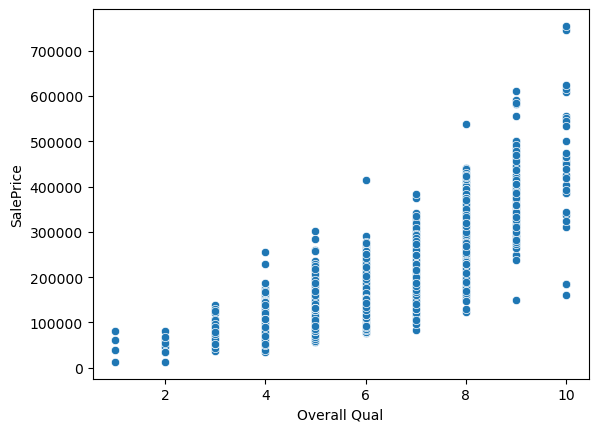

In [29]:
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

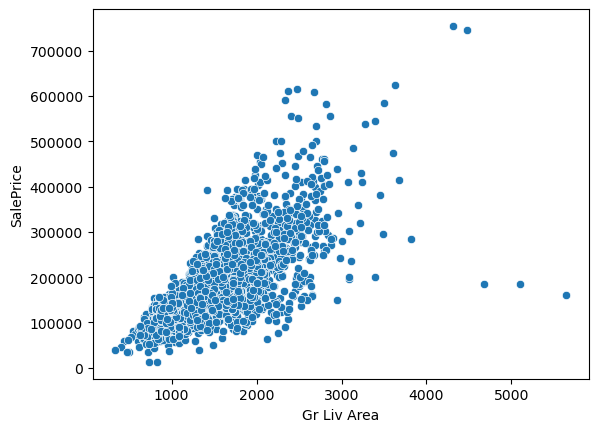

In [30]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

In [31]:
df[(df['Overall Qual']>8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [32]:
df[(df['Gr Liv Area']>4000) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [34]:
drop_ind = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<200000)].index
df = df.drop(drop_ind, axis=0)

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

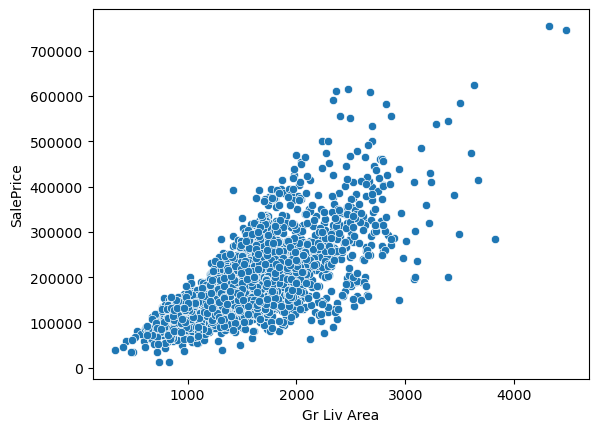

In [36]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

In [ ]:
#df.to_csv('')

In [37]:
#missing data
with open('Ames_Housing_Feature_Description.txt', 'r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [45]:
df.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [49]:
df = df.drop('PID', axis=1)

KeyError: "['PID'] not found in axis"

In [54]:
100 * df.isnull().sum() / len(df) #percents of null

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

In [62]:
def percent_missing(my_df):
    result = 100 * df.isnull().sum() / len(my_df)
    result = result[result>0].sort_values()
    return result

In [64]:
percent_nan = percent_missing(df)
percent_nan

Electrical         0.034165
Garage Cars        0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
BsmtFin SF 2       0.034165
Bsmt Unf SF        0.034165
Total Bsmt SF      0.034165
Bsmt Half Bath     0.068329
Bsmt Full Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Garage Finish      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

(0.0, 1.0)

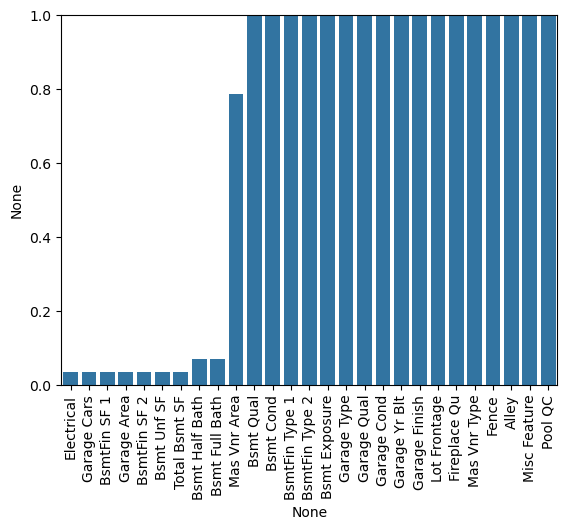

In [70]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1) #процент от 0 до 1

In [71]:
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Cars       0.034165
BsmtFin SF 1      0.034165
Garage Area       0.034165
BsmtFin SF 2      0.034165
Bsmt Unf SF       0.034165
Total Bsmt SF     0.034165
Bsmt Half Bath    0.068329
Bsmt Full Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

In [72]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [74]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [75]:
df = df.dropna(axis=0, subset=['Electrical', 'Garage Area']) #удаляет только нулевые строки в колонках

In [81]:
percent_nan = percent_missing(df)
percent_nan[percent_nan < 1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Area      0.786325
dtype: float64

(0.0, 1.0)

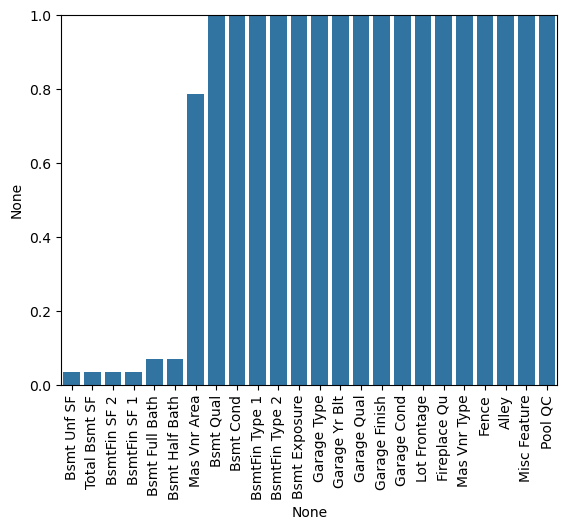

In [82]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [84]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [85]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [87]:
#так как подвалов нет в домах, запишем эти значения как нули
#для числовых признаков
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0) #заполнили пустые значени в колонках 0

#для текстовых колонок 
bsmt_str_cols = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

/var/folders/y8/vxqy41y91358t2jl4c1mlxz80000gn/T/ipykernel_82047/2159791806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0) #заполнили пустые значени в колонках 0
/var/folders/y8/vxqy41y91358t2jl4c1mlxz80000gn/T/ipykernel_82047/2159791806.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')


In [88]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


(0.0, 1.0)

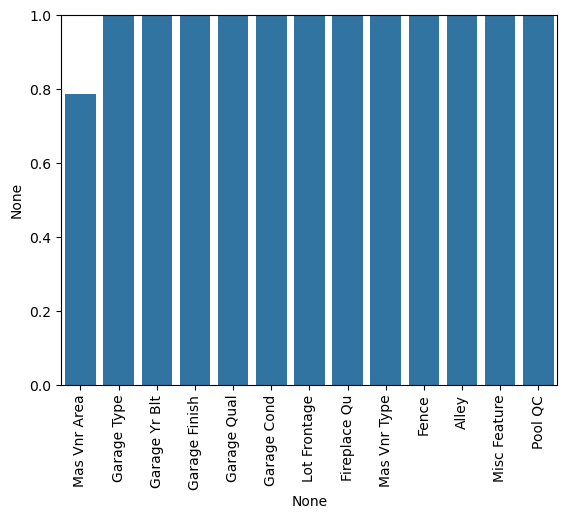

In [89]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);
plt.ylim(0,1)

In [91]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

/var/folders/y8/vxqy41y91358t2jl4c1mlxz80000gn/T/ipykernel_82047/2079381480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
/var/folders/y8/vxqy41y91358t2jl4c1mlxz80000gn/T/ipykernel_82047/2079381480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)


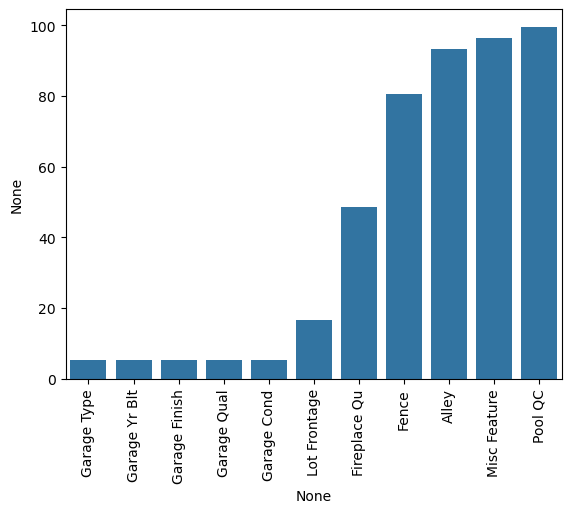

In [93]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

/var/folders/y8/vxqy41y91358t2jl4c1mlxz80000gn/T/ipykernel_82047/3858502203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[gar_str_cols] = df[gar_str_cols].fillna('None')


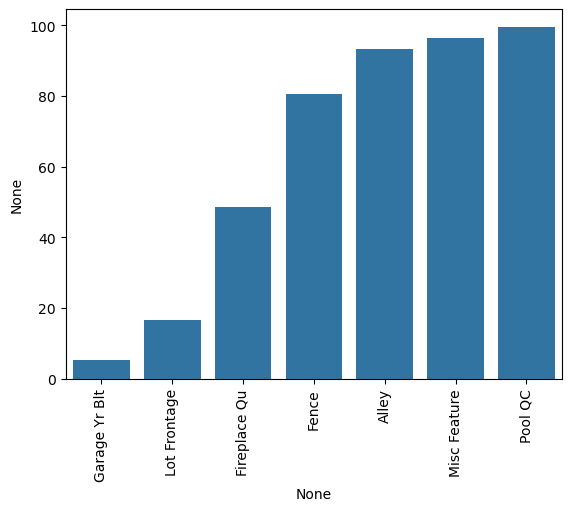

In [94]:
#работа с колонками 
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

/var/folders/y8/vxqy41y91358t2jl4c1mlxz80000gn/T/ipykernel_82047/323172034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)


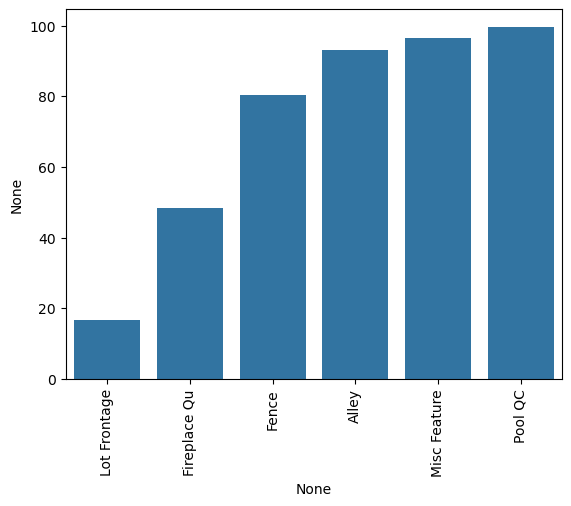

In [97]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [98]:
df = df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1)

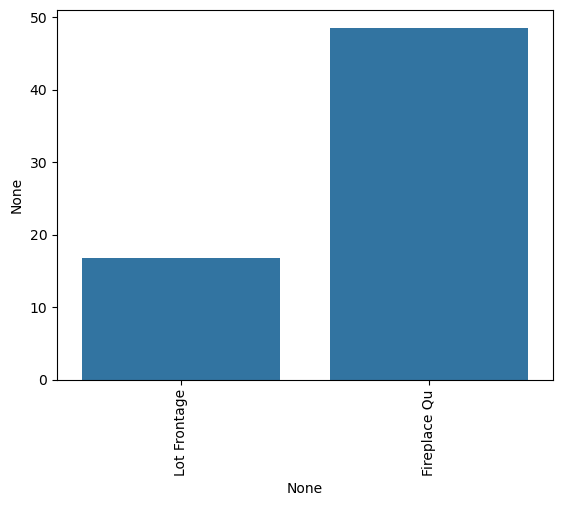

In [99]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [100]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

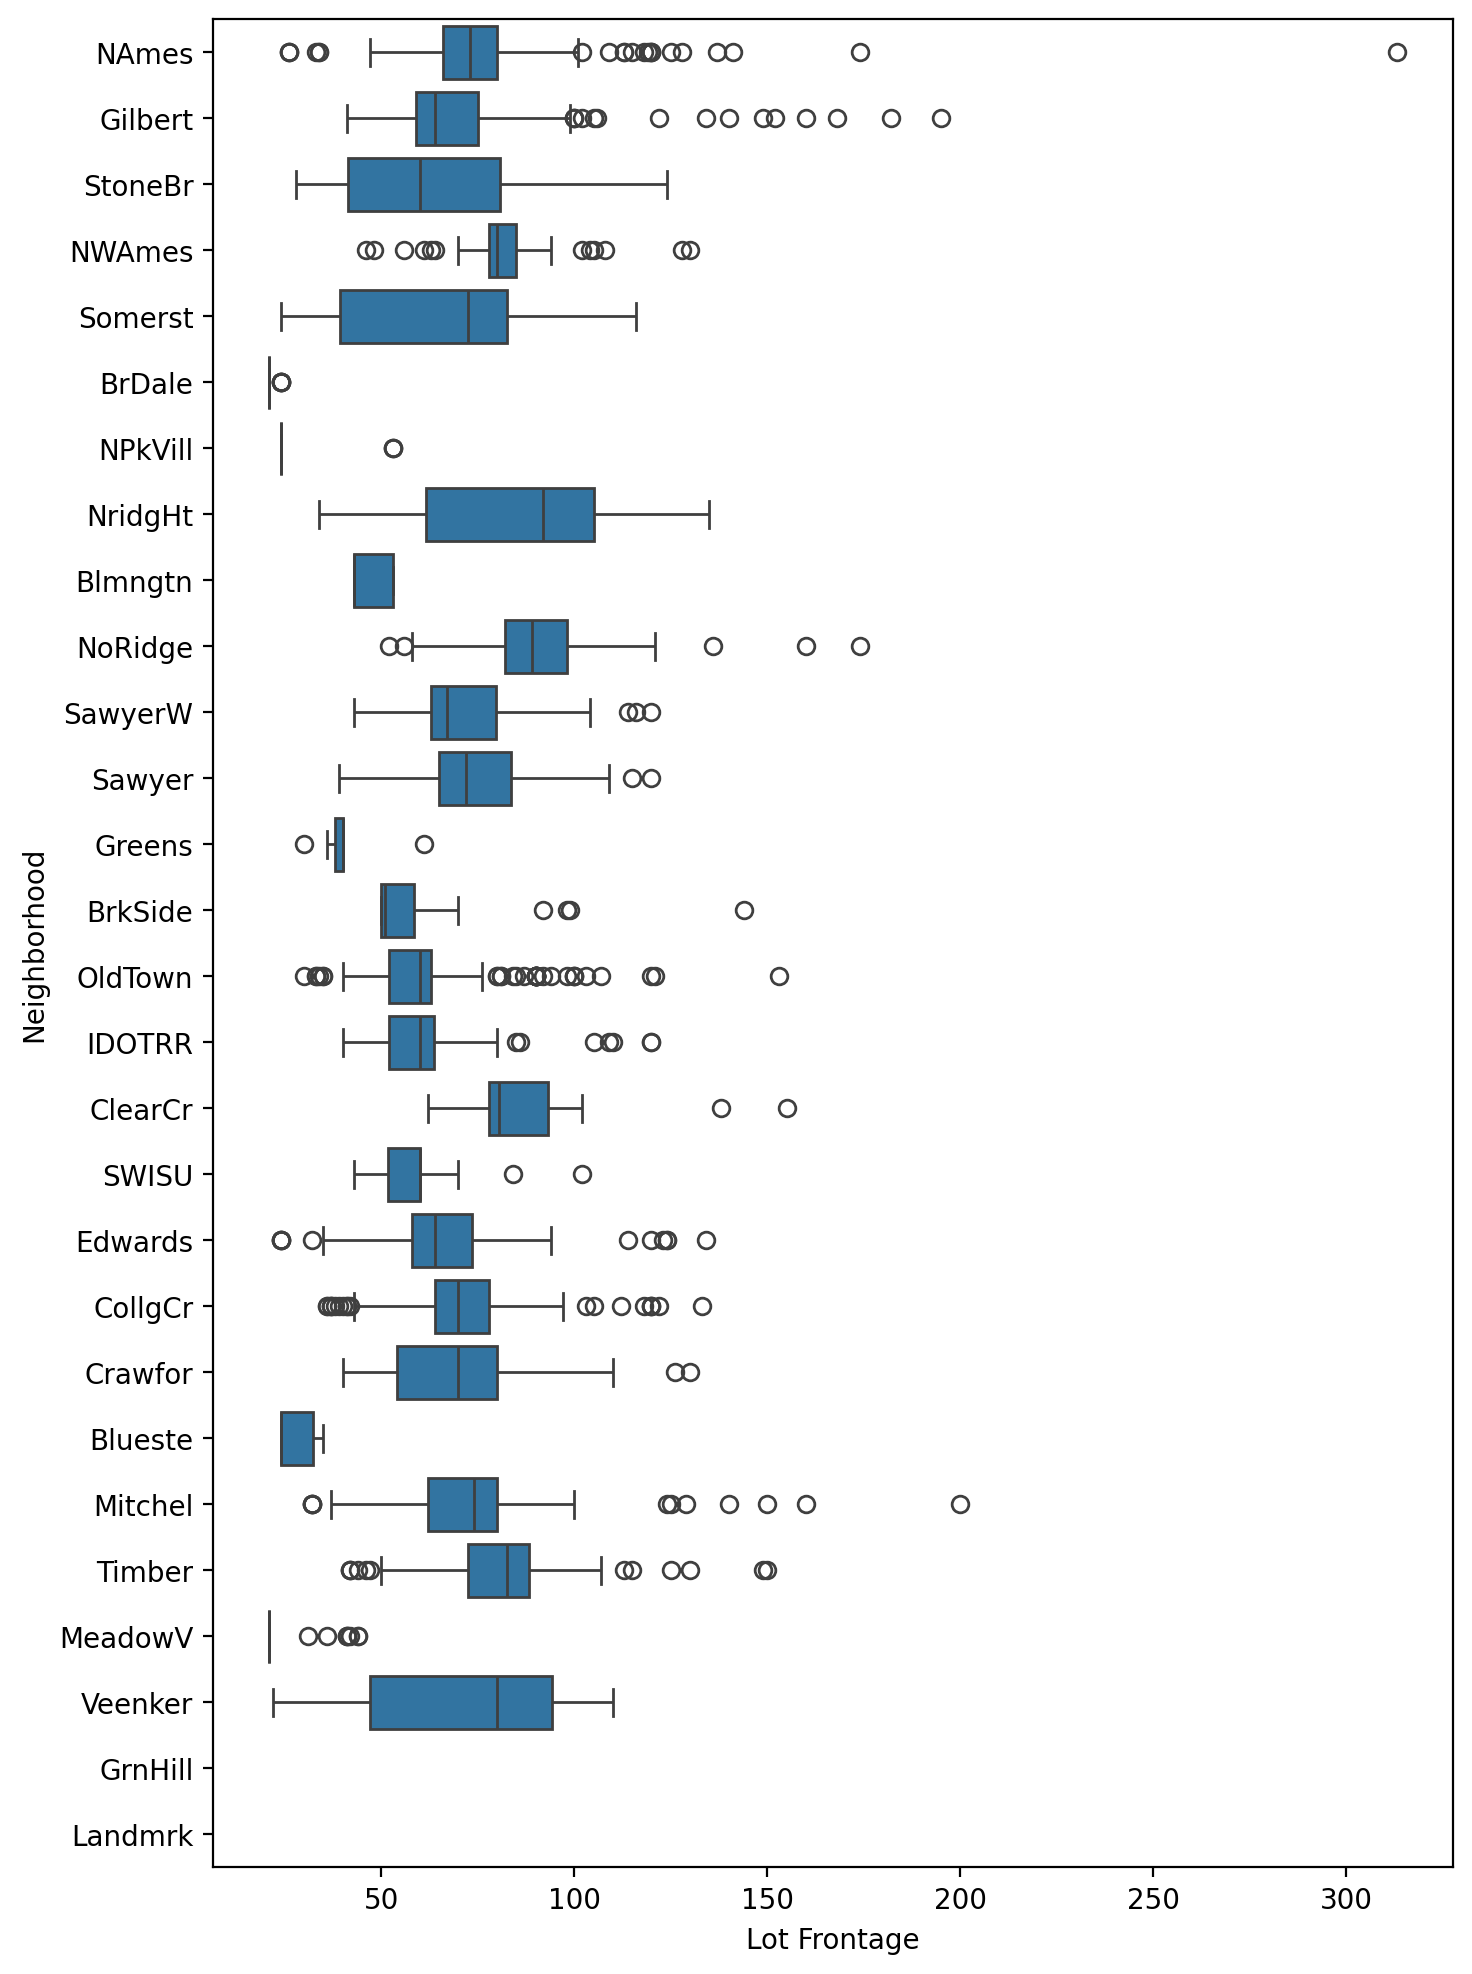

In [101]:
#найдем корреляции между созависимыми признаками и вычислим среднее значение по созависимому признаку 

plt.figure(figsize=(8,12), dpi=200)
sns.boxplot(x='Lot Frontage', y='Neighborhood', data=df, orient='h')

In [103]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [105]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [108]:
df['Lot Frontage'].isnull().sum()

0       False
1       False
2       False
3       False
4       False
        ...  
2925    False
2926    False
2927    False
2928    False
2929    False
Name: Lot Frontage, Length: 2925, dtype: bool

In [109]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [110]:
df['Lot Frontage'].isnull().sum()

np.int64(0)

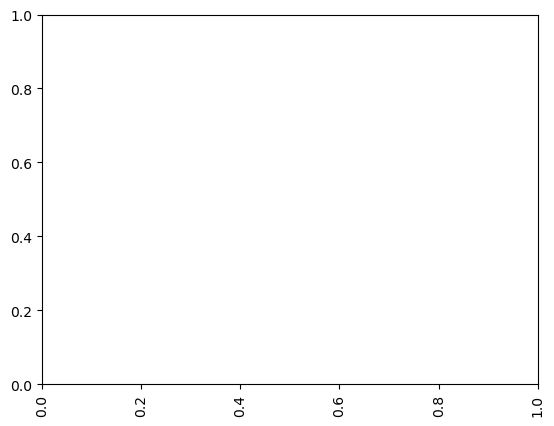

In [111]:
percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

In [112]:
#работа с категориальными данными 
df['MS SubClass'] = df['MS SubClass'].apply(str)

In [114]:
#example
direction = pd.Series(['Up','Up','Down'])
direction                      

0      Up
1      Up
2    Down
dtype: object

In [116]:
pd.get_dummies(direction) 

,Down,Up
0,False,True
1,False,True
2,True,False


In [117]:
df.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2926,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2927,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2928,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [121]:
my_object_df = df.select_dtypes(include='object')
my_numeric_df = df.select_dtypes(exclude='object')

df_object_dummies = pd.get_dummies(my_object_df, drop_first=True)
df_object_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2926,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2927,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2928,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [123]:
final_df = pd.concat([my_numeric_df, df_object_dummies], axis=1)
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,False,False,False,False,True,False,False,False,True,False
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,False,False,False,False,True,False,False,False,True,False
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,False,False,False,False,True,False,False,False,True,False
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,False,False,False,False,True,False,False,False,True,False
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,False,False,False,False,True,False,False,False,True,False
2926,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,False,False,False,False,True,False,False,False,True,False
2927,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,False,False,False,False,True,False,False,False,True,False
2928,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
df.to_csv('my_data.csv', index=False)